In [260]:
### Define modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white")

### The map display of the Africa GDP!!!
import vincent

vincent.core.initialize_notebook()
from vincent import AxisProperties, PropertySet, ValueRef


### Cluster analysis!!!
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


### Page explores the data on the "Cost of Essential Healthcare Services in Africa" from Africa Health Atlas

In [261]:
## Load and open datasets!
Consult_Cost_Public = pd.read_csv('Consult_Cost_Public.csv')
Consult_Cost_Public.head(5)
Consult_Cost_Public.columns = ['country', 'location','indicator','measure','status','Unit','Date','Value']
Consult_Cost_Public_nurse = Consult_Cost_Public[Consult_Cost_Public["indicator"] == "Nurse/Midwife"];
Consult_Cost_Public_General_Phy = Consult_Cost_Public[Consult_Cost_Public["indicator"] == "General Practitioner Physician"];
Consult_Cost_Public_Specialist_Phy = Consult_Cost_Public[Consult_Cost_Public["indicator"] == "Specialist Physician"];

Consult_Cost_Public_nurse.head(5)
Consult_Cost_Public_nurse["Date"].unique()
Dates = np.array(Consult_Cost_Public_nurse["Date"].unique())
Countries = np.array(Consult_Cost_Public_nurse["country"].unique())
### Edit!!1
Countries[3] = 'CAR'; Countries[4] = 'DRC'; Countries[10] = 'GuineaBissau'; Countries[21] = 'SierraLeone';
Countries[29] = 'Tanzania'; Countries[31] = 'CôteIvoire'; Countries[32] = 'STP'; Countries[37] = 'SouthSudan';
print(Dates, Countries)

### Extract the cost values and create a new table with the cost, dates and countries
def get_values(pd, Countries, Dates):
    n_date = len(Dates);
    n_Countries = len(Countries);
    
    data = np.zeros((n_Countries, n_date))
    for j in range(data.shape[1]):
        for i in range(data.shape[0]):
            tmp = pd[pd["country"] == Countries[i]];
            tmp2 = tmp[tmp["Date"] == Dates[j]];
            if len(tmp2["Value"].values) == 0: 
                data[i,j] = 0;
            else:
                data[i,j] = tmp2["Value"].values;
    return data
data_nurse = get_values(Consult_Cost_Public_nurse, Countries, Dates)
data_General_Phy = get_values(Consult_Cost_Public_General_Phy, Countries, Dates)
data_Specialist_Phy = get_values(Consult_Cost_Public_Specialist_Phy, Countries, Dates)

Consult_Cost_Public_nurse_pd = pd.DataFrame(data_nurse, index=Countries, columns=Dates);
Consult_Cost_Public_General_Phy_pd = pd.DataFrame(data_General_Phy, index=Countries, columns=Dates);
Consult_Cost_Public_Specialist_Phy_pd = pd.DataFrame(data_Specialist_Phy, index=Countries, columns=Dates);

Consult_Cost_Public_nurse_pd.head(5)
Consult_Cost_Public["indicator"].unique()

['2014M10' '2014M11' '2014M12' '2015M1' '2015M2' '2015M3' '2015M4' '2015M5'
 '2015M6' '2015M7' '2015M8' '2015M9' '2015M10' '2015M11' '2015M12'] ['Benin' 'Burundi' 'Cameroon' 'CAR' 'DRC' 'Egypt' 'Eritrea' 'Gabon' 'Ghana'
 'Guinea' 'GuineaBissau' 'Kenya' 'Liberia' 'Madagascar' 'Libya'
 'Mauritania' 'Mali' 'Morocco' 'Namibia' 'Nigeria' 'Senegal' 'SierraLeone'
 'Rwanda' 'Sudan' 'Seychelles' 'Swaziland' 'Togo' 'Tunisia' 'Uganda'
 'Tanzania' 'Zambia' 'CôteIvoire' 'STP' 'Chad' 'Congo' 'Gambia'
 'Mozambique' 'SouthSudan']


array(['Nurse/Midwife', 'General Practitioner Physician',
       'Specialist Physician'], dtype=object)

/Users/ckanu/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


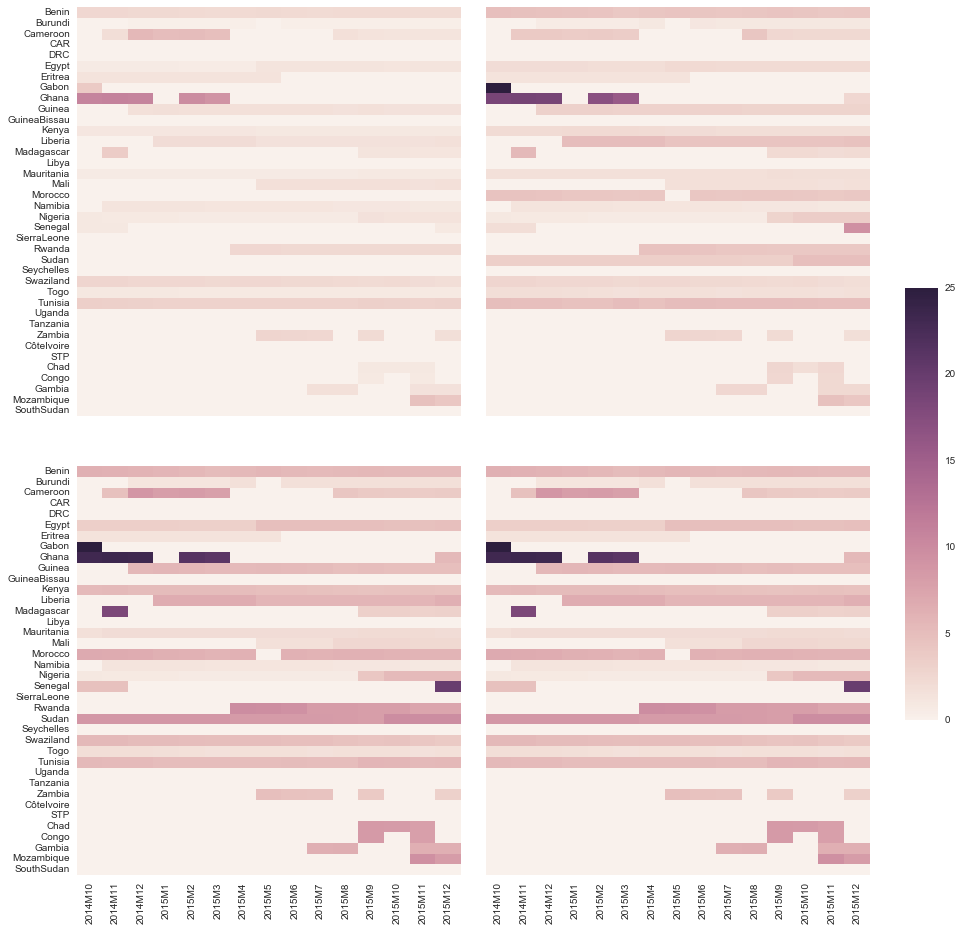

In [262]:
def plot_heatmap(DF1, DF2, DF3, DF4, plotname, n1, n2, vmin, vmax):
    HH = [DF1, DF2, DF3, DF4];
    fig, axn = plt.subplots(n1, n2, sharex=True, sharey=True)
    cbar_ax = fig.add_axes([.91, .3, .03, .4])

    for i, ax in enumerate(axn.flat):
        sns.heatmap(HH[i], ax=ax,
                    cbar=i == 0,
                    vmin=vmin, vmax=vmax,
                    cbar_ax=None if i else cbar_ax)

    fig.tight_layout(rect=[0, 0, .9, 1])

    fig.set_size_inches(15, 15)
    fig.savefig(plotname + ".png")
    
    plt.show()
    
plot_heatmap(Consult_Cost_Public_nurse_pd, Consult_Cost_Public_General_Phy_pd, Consult_Cost_Public_Specialist_Phy_pd, Consult_Cost_Public_Specialist_Phy_pd,'Consult_Cost_Public', 2, 2, 0, 25)

/Users/ckanu/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


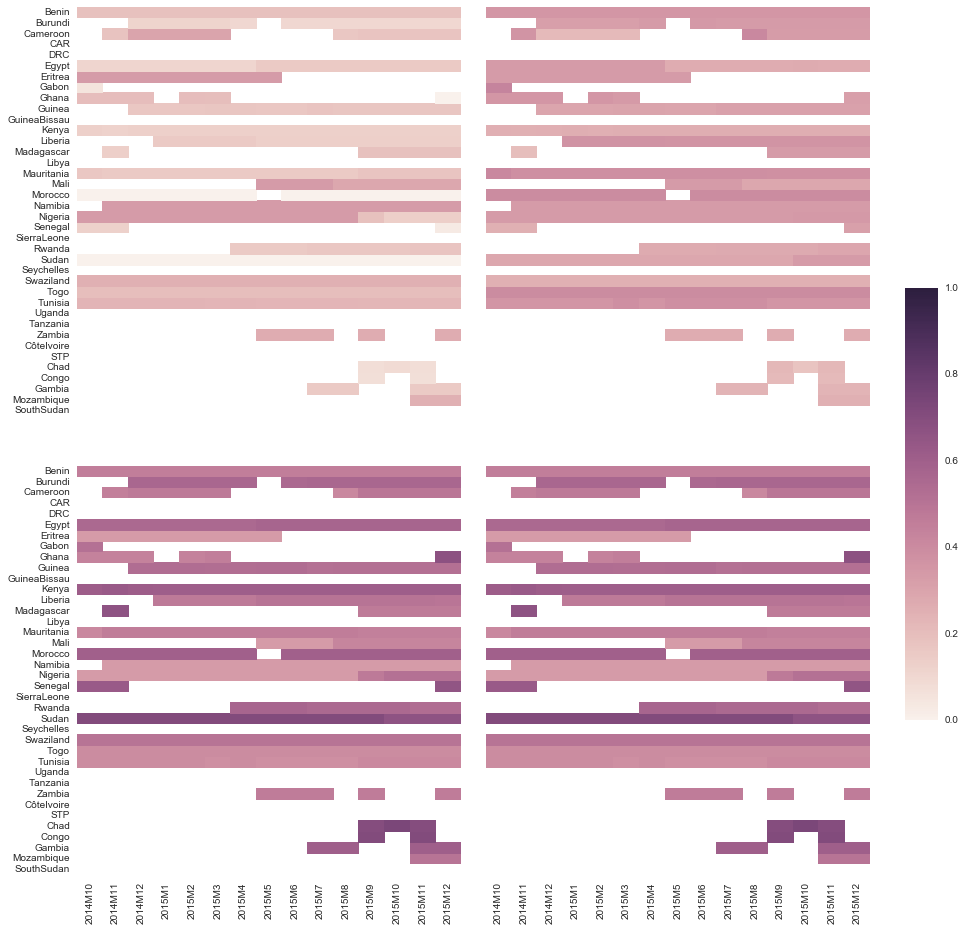

In [263]:
### Total and ratio

Consult_Cost_Public_total_pd = Consult_Cost_Public_nurse_pd + Consult_Cost_Public_General_Phy_pd + Consult_Cost_Public_Specialist_Phy_pd;

Consult_Cost_Public_nurseratio_pd = Consult_Cost_Public_nurse_pd/Consult_Cost_Public_total_pd;
Consult_Cost_Public_General_Phyratio_pd = Consult_Cost_Public_General_Phy_pd/Consult_Cost_Public_total_pd;
Consult_Cost_Public_Specialist_Phyratio_pd = Consult_Cost_Public_Specialist_Phy_pd/Consult_Cost_Public_total_pd;


plot_heatmap(Consult_Cost_Public_nurseratio_pd, Consult_Cost_Public_General_Phyratio_pd, Consult_Cost_Public_Specialist_Phyratio_pd, Consult_Cost_Public_Specialist_Phyratio_pd,'Consult_Cost_Publicratio', 2, 2, 0, 1)

In [264]:
def mean(data_nurse):
    N = data_nurse.shape[0];
    mean_pd = np.zeros((N, ))
    sigma_pd = np.zeros((N, ))
    N_pd = np.zeros((N, ))
    for i in range(N):
        tmp = data_nurse[i,:];
        index = tmp == 0;
        mean_pd[i] = np.mean(tmp[~index])
        sigma_pd[i] = np.std(tmp[~index])
        N_pd[i] = len(tmp[~index])
        
    return mean_pd, sigma_pd, N_pd

mean, deviation, num = mean(data_nurse)
print(mean)

[  2.34160354   0.29392006   2.9821415           nan          nan
   1.00125149   1.52817616   3.8591804   10.3962261    1.68801987
          nan   1.06215015   1.80734174   1.7505372           nan
   0.72727779   1.68669538          nan   1.20171215   0.97213762
   0.91176808          nan   2.4929169           nan          nan
   2.44424645   0.87104532   3.13959973          nan          nan
   2.41395884          nan          nan   0.94496021   0.8305075
   1.67700764   4.438508            nan]


/Users/ckanu/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/ckanu/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


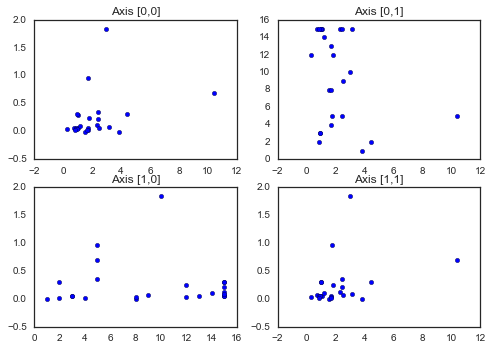

In [265]:
f, axarr = plt.subplots(2, 2)
axarr[0, 0].scatter(mean, deviation)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(mean, num)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].scatter(num, deviation)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(mean, deviation)
axarr[1, 1].set_title('Axis [1,1]')
#Consult_Cost_Public_nurse_pd.loc[].head(5)

In [266]:
from bokeh.plotting import figure, show, output_file
import numpy.matlib

data_nurse_rhp = data_nurse.reshape((len(Countries)*len(Dates), ))
data_General_Phy_rhp = data_General_Phy.reshape((len(Countries)*len(Dates), ))
data_Specialist_Phy_rhp = data_Specialist_Phy.reshape((len(Countries)*len(Dates), ))

index = data_nurse_rhp == 0;
data_nurse_rhp[index] = np.nan
index = data_General_Phy_rhp == 0;
data_General_Phy_rhp[index] = np.nan
index = data_Specialist_Phy_rhp == 0;
data_Specialist_Phy_rhp[index] = np.nan

cats = list(range(38))
#cats = "".join(str(e) for e in num) #Countries; #list("abcdefghijklmnopqrstuvwxyz123456789")str1 = ''.join(list1)
cats = (' '.join("'" + str(e)+"'"  for e in range(38))).split()
cats = (' '.join("'" + str(e)+"'"  for e in range(38))).split()

Countries_rhp = np.matlib.repmat(Countries, len(Dates), 1).reshape((len(Countries)*len(Dates), ))
cats = (' '.join(str(e)  for e in Countries)).split()

#print(cats, cats1)
df_data_nurse = pd.DataFrame(dict(score=data_nurse_rhp, group=Countries_rhp))
df_data_General_Phy = pd.DataFrame(dict(score=data_General_Phy_rhp, group=Countries_rhp))
df_data_Specialist_Phy = pd.DataFrame(dict(score=data_Specialist_Phy_rhp, group=Countries_rhp))

#cats = list("abcdefghijklmnopqrstuvwxyzabcdefghijkl")
#df.head(4)

In [267]:
# find the quartiles and IQR for each category
df_data_nurse["score"].fillna(df_data_nurse["score"].mean(), inplace=True)
groups_nurse = df_data_nurse.groupby('group')
q1_nurse = groups_nurse.quantile(q=0.25)
q2_nurse = groups_nurse.quantile(q=0.5)
q3_nurse = groups_nurse.quantile(q=0.75)
iqr_nurse = q3_nurse - q1_nurse
upper_nurse = q3_nurse + 1.5*iqr_nurse
lower_nurse = q1_nurse - 1.5*iqr_nurse
#upper.head(5)

df_data_General_Phy["score"].fillna(df_data_General_Phy["score"].mean(), inplace=True)
groups_General_Phy = df_data_General_Phy.groupby('group')
q1_General_Phy = groups_General_Phy.quantile(q=0.25)
q2_General_Phy = groups_General_Phy.quantile(q=0.5)
q3_General_Phy = groups_General_Phy.quantile(q=0.75)
iqr_General_Phy = q3_General_Phy - q1_General_Phy
upper_General_Phy = q3_General_Phy + 1.5*iqr_General_Phy
lower_General_Phy = q1_General_Phy - 1.5*iqr_General_Phy

df_data_Specialist_Phy["score"].fillna(df_data_Specialist_Phy["score"].mean(), inplace=True)
groups_Specialist_Phy = df_data_Specialist_Phy.groupby('group')
q1_Specialist_Phy = groups_Specialist_Phy.quantile(q=0.25)
q2_Specialist_Phy = groups_Specialist_Phy.quantile(q=0.5)
q3_Specialist_Phy = groups_Specialist_Phy.quantile(q=0.75)
iqr_Specialist_Phy = q3_Specialist_Phy - q1_Specialist_Phy
upper_Specialist_Phy = q3_Specialist_Phy + 1.5*iqr_Specialist_Phy
lower_Specialist_Phy = q1_Specialist_Phy - 1.5*iqr_Specialist_Phy

In [268]:
# find the outliers for each category
def outliers(group):
    cat = group.name
    return group[(group.score > upper.loc[cat]['score']) | (group.score < lower.loc[cat]['score'])]['score']

out_data_nurse = groups_nurse.apply(outliers).dropna()
out_data_General_Phy = groups_General_Phy.apply(outliers).dropna()
out_data_Specialist_Phy = groups_Specialist_Phy.apply(outliers).dropna()

def plot_box(out, groups, cats, htmlname, title, widthsize, heightsize, q1, q2, q3, iqr, upper, lower):
    # prepare outlier data for plotting, we need coordinates for every outlier.
    if not out.empty:
        outx = []
        outy = []
        for cat in cats:
            # only add outliers if they exist
            if not out.loc[cat].empty:
                for value in out[cat]:
                    outx.append(cat)
                    outy.append(value)

    p = figure(width=widthsize, height=heightsize, tools="save", background_fill_color="#EFE8E2", title=title, x_range=cats, y_range=(0, 25))

    # if no outliers, shrink lengths of stems to be no longer than the minimums or maximums
    qmin = groups.quantile(q=0.00)
    qmax = groups.quantile(q=1.00)
    upper.score = [min([x,y]) for (x,y) in zip(list(qmax.loc[:,'score']),upper.score)]
    lower.score = [max([x,y]) for (x,y) in zip(list(qmin.loc[:,'score']),lower.score)]
    
    # stems
    p.segment(cats, upper.score, cats, q3.score, line_color="black")
    p.segment(cats, lower.score, cats, q1.score, line_color="black")

    # boxes
    p.vbar(cats, 0.7, q2.score, q3.score, fill_color="#E08E79", line_color="black")
    p.vbar(cats, 0.7, q1.score, q2.score, fill_color="#3B8686", line_color="black")

    # whiskers (almost-0 height rects simpler than segments)
    p.rect(cats, lower.score, 0.2, 0.01, line_color="black")
    p.rect(cats, upper.score, 0.2, 0.01, line_color="black")

    # outliers
    if not out.empty:
        p.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)

    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = "white"
    p.grid.grid_line_width = 2
    p.xaxis.major_label_text_font_size="12pt"
    p.xaxis[0].axis_label = 'Countries'
    p.yaxis[0].axis_label = 'Statistical descriptions ($)'

    output_file(htmlname, title=title)

    show(p)
    
plot_box(out_data_nurse, groups_nurse, cats, "data_nurse.html", \
         "Cost of Essential Healthcare Services in Africa: Consultancy Cost in Public hospital for nurses/Mid Wifes", \
         2750, 800, q1_nurse, q2_nurse, q3_nurse, iqr_nurse, upper_nurse, lower_nurse)

plot_box(out_data_General_Phy, groups_General_Phy, cats, "data_General_Phy.html", \
         "Cost of Essential Healthcare Services in Africa: Consultancy Cost in Public hospital for General Practitioner Physician", \
         2750, 800, q1_General_Phy, q2_General_Phy, q3_General_Phy, iqr_General_Phy, upper_General_Phy, lower_General_Phy)

plot_box(out_data_Specialist_Phy, groups_Specialist_Phy, cats, "data_Specialist_Phy.html", \
         "Cost of Essential Healthcare Services in Africa: Consultancy Cost in Public hospital for Specialist Physician", \
         2750, 800, q1_Specialist_Phy, q2_Specialist_Phy, q3_Specialist_Phy, iqr_Specialist_Phy, upper_Specialist_Phy, lower_Specialist_Phy)